In [1]:
import data_smoothing
import find_peaks
import peak_character
import peak_classify

In [2]:
data_nm, data_time, data_z = data_smoothing.load_data('20180418_twogaussian_spectralshfit.txt')

In [3]:
smooth_matx = data_smoothing.earth_smooth_matrix(data_nm, data_z)

/Users/demiliu/miniconda3/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.7-x86_64.egg/pyearth/earth.py:802: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  pruning_passer.run()
/Users/demiliu/miniconda3/lib/python3.6/site-packages/sklearn_contrib_py_earth-0.1.0-py3.6-macosx-10.7-x86_64.egg/pyearth/earth.py:1055: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  coef, resid = np.linalg.lstsq(B, weighted_y[:, i])[0:2]


## load true peak position

In [4]:
import numpy as np
true_pos = np.genfromtxt('20180418_twogaussian_spectralshfit_x0.txt', delimiter='\t')
peak1_true = true_pos[:, 0]
peak2_true = true_pos[:, 1]

In [5]:
threshold = 0
mindist = 0
idx, height, fwhm = peak_character.peak_matrix(data_nm,smooth_matx, threshold, mindist)

# convert peak index to nm

In [6]:
idx_np = np.nan_to_num(np.array(idx))

peak1 = np.empty(len(data_time))
peak2 = np.empty_like(peak1)
for i in range(np.shape(idx_np)[0]):
    peak1[i] = data_nm[int(idx_np[:, 0][i])]
    peak2[i] = data_nm[int(idx_np[:, 1][i])]

## calculate relative error

In [7]:
def peakpos_error_array_rel(true_pos, pos_output, thre):
    error = 0
    diff = np.empty_like(true_pos)
    
    for i in range(len(true_pos)):
        diff[i] = abs(true_pos[i] - pos_output[i])
        if diff[i] >= thre:
            error += diff[i]/true_pos[i]
            
    return diff, error

In [8]:
peak1_error = peakpos_error_array_rel(peak1_true, peak1, 3)
peak2_error = peakpos_error_array_rel(peak2_true, peak2, 3)

In [9]:
print (peak1_error[1])
print (peak2_error[1])

0.1134003937706003
32.565384615384595


## now correct peak position

In [10]:
import remove_outlier as outlier
import matplotlib.pyplot as plt

In [11]:
peak1_corr = outlier.id_outliers_replacewith_interp(data_time, peak1, 1, 10)

50


/Users/demiliu/miniconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/demiliu/miniconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/demiliu/miniconda3/lib/python3.6/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/demiliu/miniconda3/lib/python3.6/site-packages/numpy/core/_methods.py:105: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/Users/demiliu/miniconda3/lib/python3.6/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


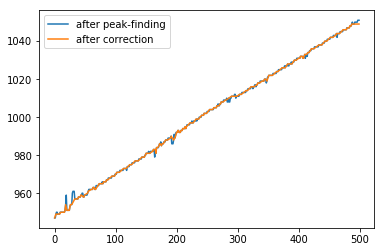

In [12]:
plt.figure()
#plt.plot(data_time, peak1_true, label = 'true position')
plt.plot(data_time, peak1, label = 'after peak-finding')
plt.plot(data_time, peak1_corr, label = 'after correction')
plt.legend()

## after removing outliers, error reduced to 0.05

In [13]:
peak1_corr_error = peakpos_error_array_rel(peak1_true, peak1_corr, 3)
print (peak1_corr_error[1])

0.055182928508352186


In [14]:
peak1_isotonic = outlier.isotonic(data_time, peak1_corr)

## after isotonic regression, error reduced to 0.04

In [15]:
peak1_isotonic_error = peakpos_error_array_rel(peak1_true, peak1_isotonic, 3)
print (peak1_isotonic_error[1])

0.04067772925765331


# peak #2

In [16]:
peak2_corr = outlier.id_outliers_replacewith_interp(data_time, peak2, 1, 100)

5


/Users/demiliu/miniconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/demiliu/miniconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/demiliu/miniconda3/lib/python3.6/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/demiliu/miniconda3/lib/python3.6/site-packages/numpy/core/_methods.py:105: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/Users/demiliu/miniconda3/lib/python3.6/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


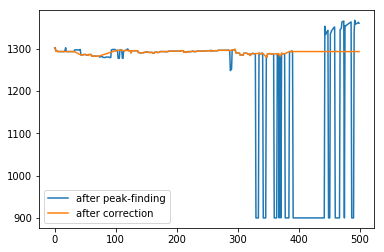

In [17]:
plt.figure()
#plt.plot(data_time, peak2_true, label = 'true position')
plt.plot(data_time, peak2, label = 'after peak-finding')
plt.plot(data_time, peak2_corr, label = 'after correction')
plt.legend()

In [18]:
peak2_corr_error = peakpos_error_array_rel(peak2_true, peak2_corr, 3)
print (peak2_corr_error[1])

3.238461538461561


In [19]:
peak2_isotonic = outlier.isotonic(data_time, peak2_corr)

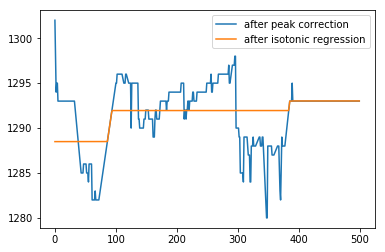

In [20]:
plt.figure()
#plt.plot(data_time, peak2_true, label = 'true position')
plt.plot(data_time, peak2_corr, label = 'after peak correction')
plt.plot(data_time, peak2_isotonic, label = 'after isotonic regression')
plt.legend()

In [21]:
peak2_isotonic_error = peakpos_error_array_rel(peak2_true, peak2_isotonic, 3)
print (peak2_isotonic_error[1])

3.2415384615384215


## classify peak

In [22]:
import pandas as pd

In [23]:
peaks_isotonic = np.empty((len(peak1_isotonic), 2))
peaks_isotonic[:, 0] = peak1_isotonic
peaks_isotonic[:, 1] = peak2_isotonic
peaks_isotonic_df = pd.DataFrame(peaks_isotonic)

In [24]:
corrected_output = peak_classify.data_grouping(peaks_isotonic_df, height, fwhm)

In [25]:
peak_dict = peak_classify.cluster_classifier(peaks_isotonic_df, corrected_output)

In [26]:
peak1_classify = np.array(peak_dict['peak_0'])[:,0]

In [27]:
peak2_classify = np.array(peak_dict['peak_1'])[:,0]

In [37]:
print (len(peak2_classify))
print (len(peak1_true))
print (len(peak1_corr))
print (len(peak1_isotonic))

500
500
500
500


In [38]:
peak1_classify_error = peakpos_error_array_rel(peak1_true, peak2_classify, 3)

In [42]:
print (peak1_classify_error[1])
print (peak2_classify_error[1])

0.04067772925765331
3.2415384615384215


In [39]:
peak2_classify_error = peakpos_error_array_rel(peak2_true, peak1_classify, 3)

# Peak 1 error reduced after each step; classification didn't help

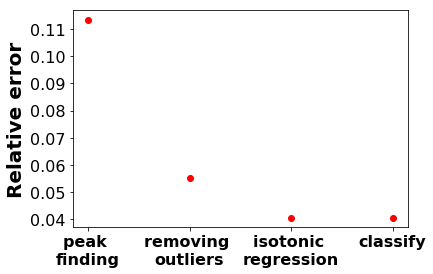

In [40]:
plt.figure()
steps = [1, 2, 3, 4]
error = [peak1_error[1], peak1_corr_error[1], peak1_isotonic_error[1], peak1_classify_error[1]]
plt.plot(steps, error,'o', color = 'r')
plt.xticks(steps, ['peak \nfinding', 'removing \noutliers', 'isotonic \nregression', 'classify'], fontsize = 16, fontweight = 'bold')
plt.ylabel('Relative error', fontsize = 20, fontweight = 'bold')
plt.yticks(fontsize = 16)
plt.show()

# Peak 2 error reduced significantly after removing outliers

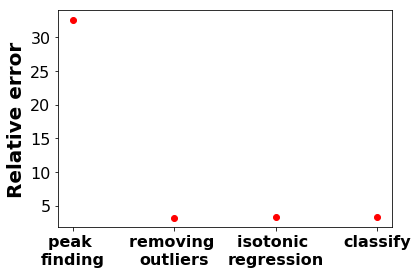

In [41]:
plt.figure()
steps = [1, 2, 3, 4]
error = [peak2_error[1], peak2_corr_error[1], peak2_isotonic_error[1], peak2_classify_error[1]]
plt.plot(steps, error,'o', color = 'r')
plt.xticks(steps, ['peak \nfinding', 'removing \noutliers', 'isotonic \nregression', 'classify'], fontsize = 16, fontweight = 'bold')
plt.ylabel('Relative error', fontsize = 20, fontweight = 'bold')
plt.yticks(fontsize = 16)
plt.show()